<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий студента</h1>

Вера, привет!
    
    Хочу сказать тебе огромное спасибо. Я полностью переписал работу. Я не удалял твои комментарии. Надеюсь, в этот раз работа лучше подходит содержанию задания. Также старался немного "потворить" и следовать твоим комментария.
    
    Сорри, что долго =(

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Меня зовут - Сысоева Вера.
    
Извини за долгую проверку. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Видно, что ты проделал очень большую работу над проектом, надеюсь, мои комментарии помогут перевести проект на качественно новый уровень.
    
Проекту не хватает структурированности и логичности повествования. Постарайся развернуто ответить на все вопросы из брифа и связать это в логическую последовательность 

# Описание проекта.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Откройте файл с данными и изучите общую информацию.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

games = pd.read_csv('/datasets/games.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Описание данных.

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Имеются пропуски в столбцах - critic_score, user_score и rating. Так как данные добыты из открытых источников, то нет ничего увидительного, что в них имеются пропуски, которые могли возникнуть вследствии отсутствия данных и прочего.



<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но все-таки лучше выводить info, а то так не все проблемы видны, например пропуски есть и в других стольбцах, но в 5 строках их не видно.
    
Также можно более подробно рассмотреть проблемы в данных, используя describe и unique

# Шаг 2. Подготовьте данные.

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но все-таки все рассчетные столбцы лучше вводить после предобработки.

# Замените названия столбцов (приведите к нижнему регистру).

In [32]:
games.columns = [_.lower() for _ in games.columns]
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [33]:
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')

games['na_sales'] = games['na_sales'].fillna(0)
games['eu_sales'] = games['eu_sales'].fillna(0)
games['jp_sales'] = games['jp_sales'].fillna(0)
games['other_sales'] = games['other_sales'].fillna(0)

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Преобразовал данные по годам в int для удобства работы с ними. По рейтингам не нужно заполнять пропуски, так как по ним надо будет делать корреляционный анализ, а на него заполнение чем-либо плохо влияет.Если заполнить пропуски медианой или средним, то коэффициент корреляции может сильно сместиться. Если заполнить каким-то отвлеченным значением, то будет совсем плохо.


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ок, теперь все намного лучше, пойдем далее.

# Обработайте пропуски при необходимости.

-Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
-Опишите причины, которые могли привести к пропускам;
-Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

В графе с названием всего два пропуска, их можно удалить без потерь.

In [34]:
games.dropna(subset = ['name'], inplace = True)

Проверка на дубликаты.

In [35]:
print(games['name'].duplicated().sum(), 'дубликатов')

5154 дубликатов


Дубликать есть, попробуем привести их к нижнему регистру, чтобы понять увеличится их кол-во или нет. Если нет, то оставлю как есть.

In [36]:
print(games['name'].str.lower().duplicated().sum(), 'дубликатов')

5154 дубликатов


Проверим наличие дубликатов в названии и платформе одновременно, так как одна и та же игра могла быть на нескольких платформах.

In [37]:
print(games.duplicated(['name', 'platform']).sum(), 'дубликатов')

4 дубликатов


C 4-мя строчками можно спокойно расстаться.

In [38]:
games = games.drop_duplicates(['name', 'platform']).reset_index(drop = True)
print(games.duplicated(['name', 'platform']).sum(), 'дубликатов осталось')

0 дубликатов осталось



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Да, удалить хороший вариант.

В столбце с оценками зрителей есть значения tbd, что означает - в ожидании оценки. По сути, то же самое что и NaN, поэтому заменяем и приводим к типу float.

In [39]:
games['user_score'].loc[games['user_score'] == 'tbd'] = np.nan
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 11 columns):
name               16709 non-null object
platform           16709 non-null object
year_of_release    16709 non-null int64
genre              16709 non-null object
na_sales           16709 non-null float64
eu_sales           16709 non-null float64
jp_sales           16709 non-null float64
other_sales        16709 non-null float64
critic_score       8133 non-null float64
user_score         7586 non-null float64
rating             9945 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [40]:
games['total_sales'] = games.filter(like='sales').sum(axis=1)   
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 12 columns):
name               16709 non-null object
platform           16709 non-null object
year_of_release    16709 non-null int64
genre              16709 non-null object
na_sales           16709 non-null float64
eu_sales           16709 non-null float64
jp_sales           16709 non-null float64
other_sales        16709 non-null float64
critic_score       8133 non-null float64
user_score         7586 non-null float64
rating             9945 non-null object
total_sales        16709 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, очень компактный вариант подсчета.

# Шаг 3. Проведите исследовательский анализ данных

# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [41]:
games.groupby('year_of_release').name.count()

year_of_release
0        268
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

После 1993 начинается существенный рост количества игр.
Я возьму период начиная с 2000 года, так как 1) больше игр выходило 2) данные там более актуальные.


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Ок, но лучше было сделать график - нагляднее.

In [42]:
actual_years = games.query('year_of_release > 1999')
display(actual_years.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Возможный вариант, но не самый оптимальный. Зполнение 2021 годом не хорошо по двум причинам. Во-первых, это фактически равносильно удалению, поскольку весь анализ будет проходить в разрезе годов релиза. Во-вторых, для маркерного значения лучше брать 0, т.к., если его забыть отсееть, то на графике он уйдет влево и не будет мешать.



<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Нет, это не верный подход. Посмотри внимательнее на строки с пропущенным годом, там, наверное стоят продажи, а это значит, что это не ибудущие игры, а просто пропуски в данных.
    
В любом случае, заполняем мы 0 или 2021, эти данные надо будет отфильтровать. На графиках не должно быть не 0 не 2021 года. Я просто писала, что 0 легче заметить и отфидльтровать, если этот шаг случайно пропущен.

<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий наставника</h1>

Оставлять 2021 год не верно. По факту график не достоверный.



<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий наставника</h1>

Не важно чем ты заполняешь, для графика и для анализа - эти данные надо отфильтровать, иначе график не достоверный.



<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Ок, для всех графиков одинаковое замечание:
    
    - убрать 2021 год
    - в качестве итога надо указать год, до которого данные нам не интересны и мы их отбросим.

Буду сразу работать с актуальным периодом, то есть с данными начиная с 2000.

# Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

# Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

# Не учитывайте в работе данные за предыдущие годы.

,total_sales
year_of_release,
2000,201.66
2001,331.46
2002,394.97
2003,357.54
2004,418.68
2005,456.57
2006,517.71
2007,604.75
2008,671.50


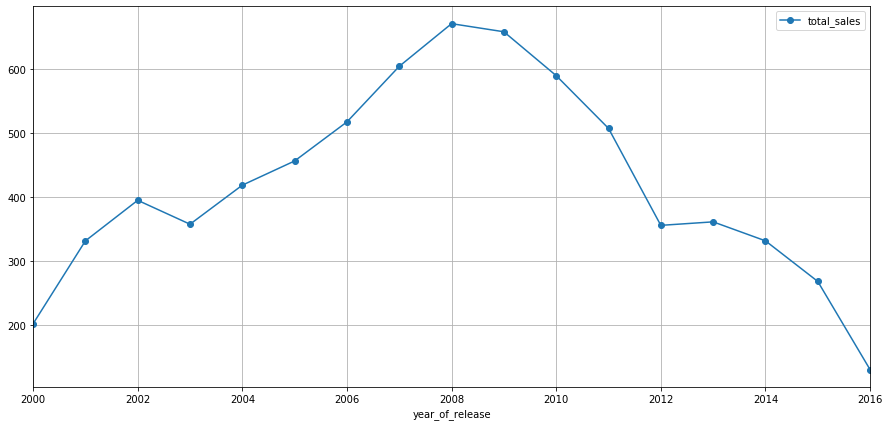

In [43]:
actual_years_platform_pivot = actual_years.pivot_table(index='year_of_release', values ='total_sales', aggfunc='sum')
actual_years_platform_pivot.plot(y = 'total_sales', 
                          style = 'o-',
                          figsize = (15, 7),
                          grid = True)
actual_years_platform_pivot


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ок, вот и график, хорошо, но лучше было смотреть график именно с хвостом, тогда понятно, почему мы его отбросили.

In [44]:
def top_10(data, location, genre, top=10):
    
    return data.pivot_table(index = genre, 
                            values = location, 
                            aggfunc='sum').sort_values(by = location,
                                                         ascending = False)[:top]

top_10(actual_years, 'total_sales', 'platform',10)

,total_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Топ получен верно.

In [45]:
sales_platform = actual_years.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
sales_platform.fillna(0, inplace=True)
sales_platform

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,26.34,51.81,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,33.97,3.25,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.14,12.38,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


В среднем срок жизни платформ около 6-8 лет. Хотя платформу PS (2,3), Wii и ряд других я бы отнёс к самым долгоиграющим.


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Все правильно посчитано, но лучше тоже было сделать график.

# Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

На данный момент, три платформы лидируют в продажах. Это PS4, XOne и 3DS, но их продажи в 2016 падают по сравнению с предыдущими периодами. Есть подозрение, что из-за того, что в 2016 много пропусков и имеющиеся данные не предоставляют полную картину.


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

ок.

# Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

(0, 4)

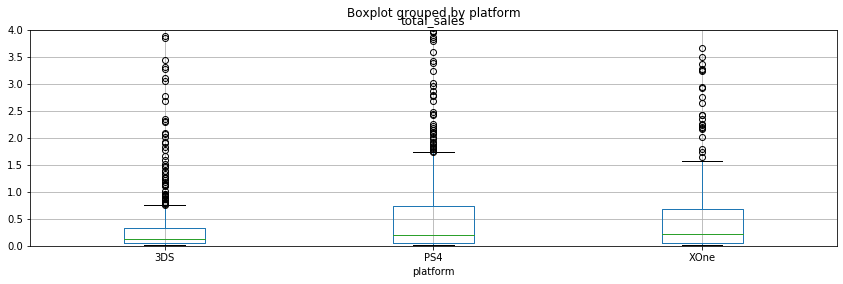

In [46]:
actual_platforms = ['PS4', '3DS', 'XOne']

df_games_box = actual_years.query('platform in @actual_platforms').groupby(['name', 'platform']).agg({'total_sales': 'sum'})

df_games_box.boxplot('total_sales', by='platform', figsize=(14, 4))
plt.ylim(0, 4)

На графике видно, что на всех платформах основная масса продаж лежит в интервале от 1.7 до 2, хотя игры на PS4 прибыльнее, чем на других платформах. Выбрал эти три платформы ввиду их сильных продаж в 2016 по сравнению с конкурирующими платформами.


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, теперь ящики с усами правильные.

# Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


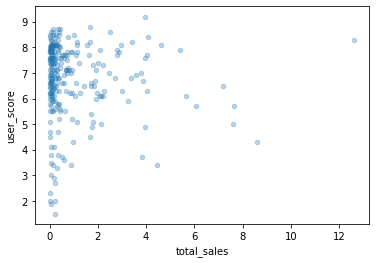

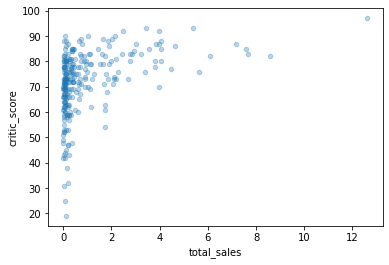

In [47]:
top_platform = ['PS4']
work_data = actual_years.query('platform in @top_platform')
display(work_data[['user_score', 'critic_score','total_sales']].corr())

work_data.plot(x='total_sales', y='user_score', kind='scatter', alpha = 0.3)
plt.show()

work_data.plot(x='total_sales', y='critic_score', kind='scatter', alpha = 0.3)
plt.show()

Больше всего отзывов приходится на игры с низкими продажами или дешёвые игры. В правой части практически нет ни отзывов, ни продаж.


<font color = red> Ты построил и рассчитал корреляцию между оценками критиков и оценками пользователей, а надо считать корреляцию между оценками и продажами. Это надол делать сначала для одной наиболее перспективной платформы, а потом сравнить с результатами для других платформ</font>


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Все верно. Хорошо, что рассчитал именно матрицу коррелций, а не отдельные значения.

# Соотнесите выводы с продажами игр на других платформах.

,user_score,critic_score,total_sales
user_score,1.000000,0.547639,0.106706
critic_score,0.547639,1.000000,0.354252
total_sales,0.106706,0.354252,1.000000


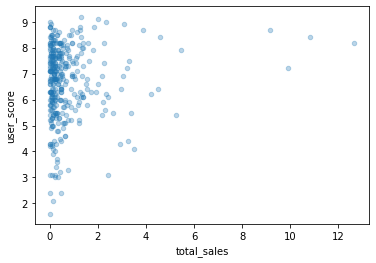

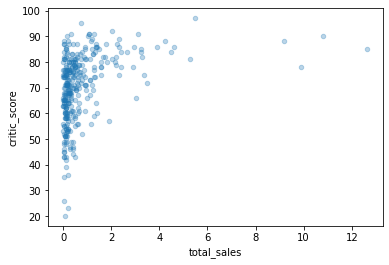

In [48]:
tt_platform = ['3DS', 'XOne']
work2_data = actual_years.query('platform in @tt_platform')
display(work2_data[['user_score', 'critic_score','total_sales']].corr())

work2_data.plot(x='total_sales', y='user_score', kind='scatter', alpha = 0.3)
plt.show()

work2_data.plot(x='total_sales', y='critic_score', kind='scatter', alpha = 0.3)
plt.show()

В целом, графики зеркалятся по платформам без явных и критичных отклонений.


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ок, все верно.

# Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Распределение игр по жанрам:

In [49]:
actual_platforms = ['PS4', '3DS', 'XOne']

new_data = actual_years.query('platform in @actual_platforms')

print(new_data.pivot_table(index='genre', 
                        values ='name', 
                        aggfunc='count').sort_values(by = 'name',
                                                     ascending = False).head(10))

              name
genre             
Action         416
Role-Playing   152
Sports         109
Misc            93
Shooter         85
Adventure       79
Racing          49
Platform        45
Fighting        39
Simulation      39


Жанры с высокими продажами:

In [50]:
print(new_data.pivot_table(index='genre', 
                        values ='total_sales', 
                        aggfunc='sum').sort_values(by = 'total_sales',
                                                   ascending = False).head())

              total_sales
genre                    
Action             191.25
Shooter            150.11
Role-Playing       123.74
Sports              88.50
Platform            41.15


Жанры с низкими продажами:

In [51]:
print(new_data.pivot_table(index='genre', 
                        values ='total_sales', 
                        aggfunc='sum').sort_values(by = 'total_sales',
                                                   ascending = True).head())

           total_sales
genre                 
Strategy          3.13
Puzzle            5.59
Adventure        13.85
Fighting         21.66
Misc             26.61



<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но опять же диаграммы были бы полезными.

Пользователи предпочитают жанр Экшн и практически не играют в Стратегии. Стоит также отметить, что наибольшее количество игр выпускается в жанре Экшн, в то время как Стратегии даже не попали в Топ10. 
Я считаю, что рынком рулят потребители поэтому и количество игр такое высокое.

<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий наставника</h1>

Сама структура анализа не верна. самая популярная платформа и самый популярный жанр - это очень бедный анализ. Надо пройти следующие шаги:
    
    - определеить топ 10 платформ.
    - для этих топ 10 платформ построить распределдение продаж по годам
    - из полученного распределение получить время жтзни платформ
    - из полученного времени жизни определить актуальный период
    - отсеять данные по полученному актуальному периоду
    - посмотреть динамику продаж в актуальный период
    - посмотреть актуальные платформы
    - только для актуальных платформ построить ящики с усами по продажам
    - посмотреть топ жаноров и проанализировать.


<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Здесь во-первых:
    - надо рассматривать только актуальные платформы
    - для одной платформы (которую считаешь самой перспективной) посмотерть корреляцию продаж с оценками критиков и пользователей - рассчитать коэффициенты корреляции, отобразить
    - сравнить результат с другими актуальными платформами
    - сделать выводы.

# Шаг 4. Составьте портрет пользователя каждого региона

# Определите для пользователя каждого региона (NA, EU, JP)

# Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [52]:
platforms_act = ['3DS','PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

final_data = actual_years.query('platform in @platforms_act')
def top_5(data, location, genre):
    print(final_data.pivot_table(index = genre, 
                            values = location, 
                            aggfunc='sum').sort_values(by = location,
                                                         ascending = False).head())
    print()
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5(final_data, row, 'platform')

          na_sales
platform          
X360        594.74
Wii         486.87
PS3         390.13
PS4         108.74
XOne         93.12

          eu_sales
platform          
PS3         327.20
X360        268.19
Wii         258.32
PS4         141.09
PC          121.28

          jp_sales
platform          
3DS         100.62
PS3          79.41
Wii          68.28
PSV          21.84
PS4          15.96



В Америке и Европе в топе X360, также стоит отметить, что PS3 занимает лидирующие позиции во всём мире.

# Самые популярные жанры (топ-5). Поясните разницу.

In [53]:
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5(final_data, row, 'genre')

              na_sales
genre                 
Action          417.96
Shooter         357.43
Sports          337.56
Misc            218.86
Role-Playing    139.68

         eu_sales
genre            
Action     301.95
Shooter    232.94
Sports     224.39
Misc       112.59
Racing      99.70

              jp_sales
genre                 
Role-Playing     79.22
Action           73.02
Sports           31.15
Misc             26.26
Platform         22.58



Экшн и Спорт популярны везде, Шутеры популярны в Америке и Европе. Возможно тут есть определенная зависимость от пользовательских предпочтиней.

# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [54]:
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5(final_data, row, 'rating')

        na_sales
rating          
M         555.17
E         544.44
T         356.76
E10+      230.99
EC          0.71

        eu_sales
rating          
M         389.22
E         354.35
T         221.00
E10+      134.16
RP          0.03

        jp_sales
rating          
E          78.89
T          53.39
M          39.84
E10+       13.58
EC          0.00



Топ3 выглядит одинаково в Америке и Европе, в Японии теже рейтинги, но с измененным порядком. Разница в долях продаж между М и Е минимальна в Америке и Европе, жанр Т слабее. В Японии отрывы более существенны.



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, только лучше в конце еще раз привести info в качестве итога.



<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

В итоговых выводах по разделу надо описать портреты пользователей по каждому региону.

# Шаг 5. Проверьте гипотезы

Альфу принимаю за 0.05.

In [55]:
def hp(data_1, data_2, alpha=0.05):
    results = st.ttest_ind(
        data_1['user_score'], 
        data_2['user_score'],
        )

    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Использование функции - это хорошо.

In [56]:
final_data['critic_score'] = final_data['critic_score'].fillna(final_data['critic_score'].mean()).astype('int')
final_data.loc[final_data['user_score'] == 'tbd', 'user_score'] = final_data['critic_score'].astype('float') / 10
final_data['user_score'] = pd.to_numeric(final_data['user_score'], errors = 'raise')
final_data['user_score'] = final_data['user_score'].fillna(final_data['user_score'].mean())
final_data['user_score'] = final_data['user_score'] * 10
final_data['user_score'] = final_data['user_score'].astype('int')

# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [57]:
hp(final_data.query('platform == "XOne"'), final_data.query('platform == "PC"'))

p-значение: 3.3644846065324786e-05
Отвергаем нулевую гипотезу


Получается рейтинг платформ различен.

# Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [58]:
hp(final_data.query('genre == "Action"'), final_data.query('genre == "Sports"'))

p-значение: 6.708377487139887e-17
Отвергаем нулевую гипотезу


Действительно, пользовательские рейтинги разные для обоих жанров.

# Шаг 6. Напишите общий вывод

Пик выпуска и продаж игр был с 2006 по 2011 года. Соответственно, примерно на этот же период приходится и наибольшее количество продаж


В 2016 году лидируют по продажам и популярности платформы PS4, XOne и 3DS с большим отрывом от остальных. Хотя если взять весь актуальный период, то лидеры PS2,X360 и PS3, но их продажи падают год от года. Самые популярные жанры - Экшн и Шутер.

На данном этапе, я бы порекомендовал выпускать игру на PS4, XOne и 3DS в жанре Экшн и Шутер. На мой взгляд, очень близкие между собой жанры. 

Ведь самое важное, чтобы потребитель был доволен и покупал, а он доволен и покупает по всему миру. Также можно закрепить успех Спортом.

<div style="border:solid red 2px; padding: 20px"> <h1 style="color: red; margin-bottom:20px">Комментарий наставника</h1>

Заполнять пропуски и домножать на 10 не нужно. Заполнение пропусков сильно искажает результат, а домножение на 10 просто не нужно. Надо рассматривать даннве только за определенный актуальный период.

<font color = red> Во-первых, актуальные данные - это не только 2016 год, а данные за актуальный период, который определен в анализе. Во-вторых взять данные с пропусками и взять данные с заполненными пропусками - это разные вещи. В данных мы отбросим пропуски и унас будут только достоверные данные, а так ты исказил распределение </font>


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но стоило более подробно рассмотреть изучаемые наборы. Например просмотреть распределение, по условиям использования т-теста оно должно быть нормальным....